In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
plt.rcParams['font.family']='NanumGothic'

# 단순선형 회귀분석 연습

### STEP1 데이터 구성하기

In [3]:
df_raw =pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/부품수리시간.csv",engine='python',encoding='cp949')
df_raw.head()
                    
                    
                    
                    

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


### STEP2 변수 간의 경향성 파악_ 그래프(산점도)분석

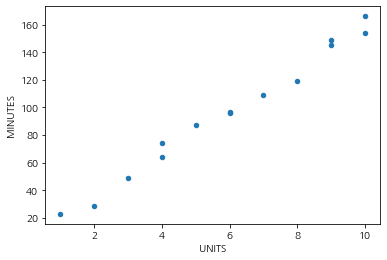

In [5]:
df_raw.plot.scatter(x ='UNITS',y='MINUTES')

### STEP2 변수 간의 경향성 파악_ 상관관계분석

In [6]:
df_raw.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


### STEP3 회귀모델 생성

In [7]:
reg_model =smf.ols(formula = "MINUTES ~ UNITS", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           8.92e-13
Time:                        11:58:52   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### STEP 4 오차의 기본가정 검토 

#### 등분산성/독립성 검정 

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


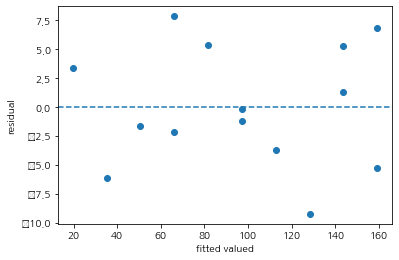

In [8]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted valued')
plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


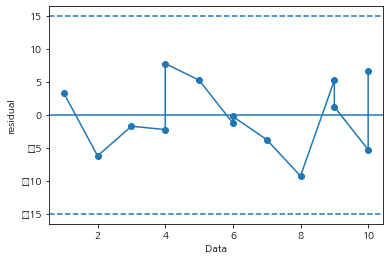

In [9]:
plt.plot(df_raw["UNITS"],reg_result.resid,marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y=0, linestyle='-')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='--')
# 잔차가 t=0을 기준으로 Random하게 산포되어 있으므로 등분산성과 독립성을 만족

####  정규성검정

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


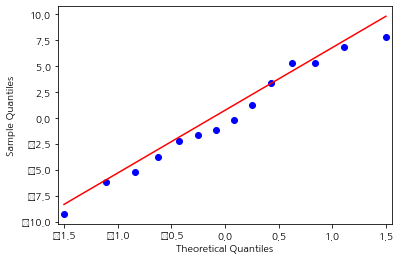

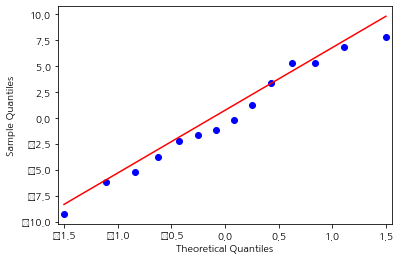

In [10]:
qqplot(reg_result.resid, line='q')

In [11]:
from statsmodels.stats.stattools import omni_normtest

omni_normtest(reg_result.resid, axis=0)
# 정규분포 직선을 중심으로 분포하고 검정 통계량이 귀무가설을 채택하므로 정규분포를 따름

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

# 다중 회귀분석_연습

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중 공선성 확인
from sklearn.linear_model import LinearRegression
# 선형회귀모형
from sklearn.feature_selection import RFE
#변수 선택법(후진제거법)
from sklearn.preprocessing import StandardScaler
#Scale 변환 => 표준화 회귀계수 산출

###  STEP1. 데이터 구성하기

In [13]:
df_raw = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv",engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [14]:
df_raw.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


###  STEP2 . 변수 간의 경향성 파악 -그래프 분석

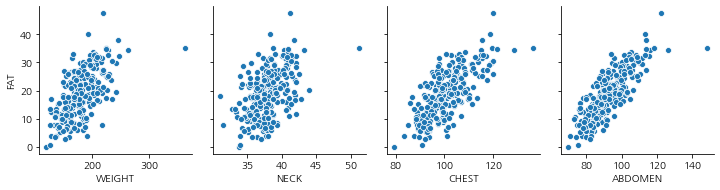

In [15]:
sns.pairplot(df_raw,y_vars='FAT',x_vars=["WEIGHT",'NECK','CHEST','ABDOMEN'])

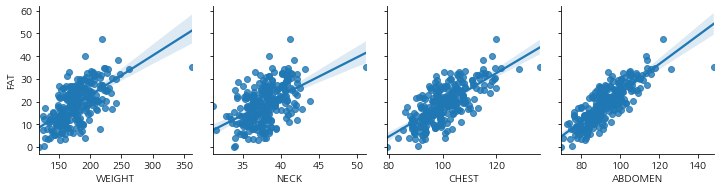

In [16]:
sns.pairplot(df_raw,y_vars='FAT',x_vars=["WEIGHT",'NECK','CHEST','ABDOMEN'],kind ='reg')

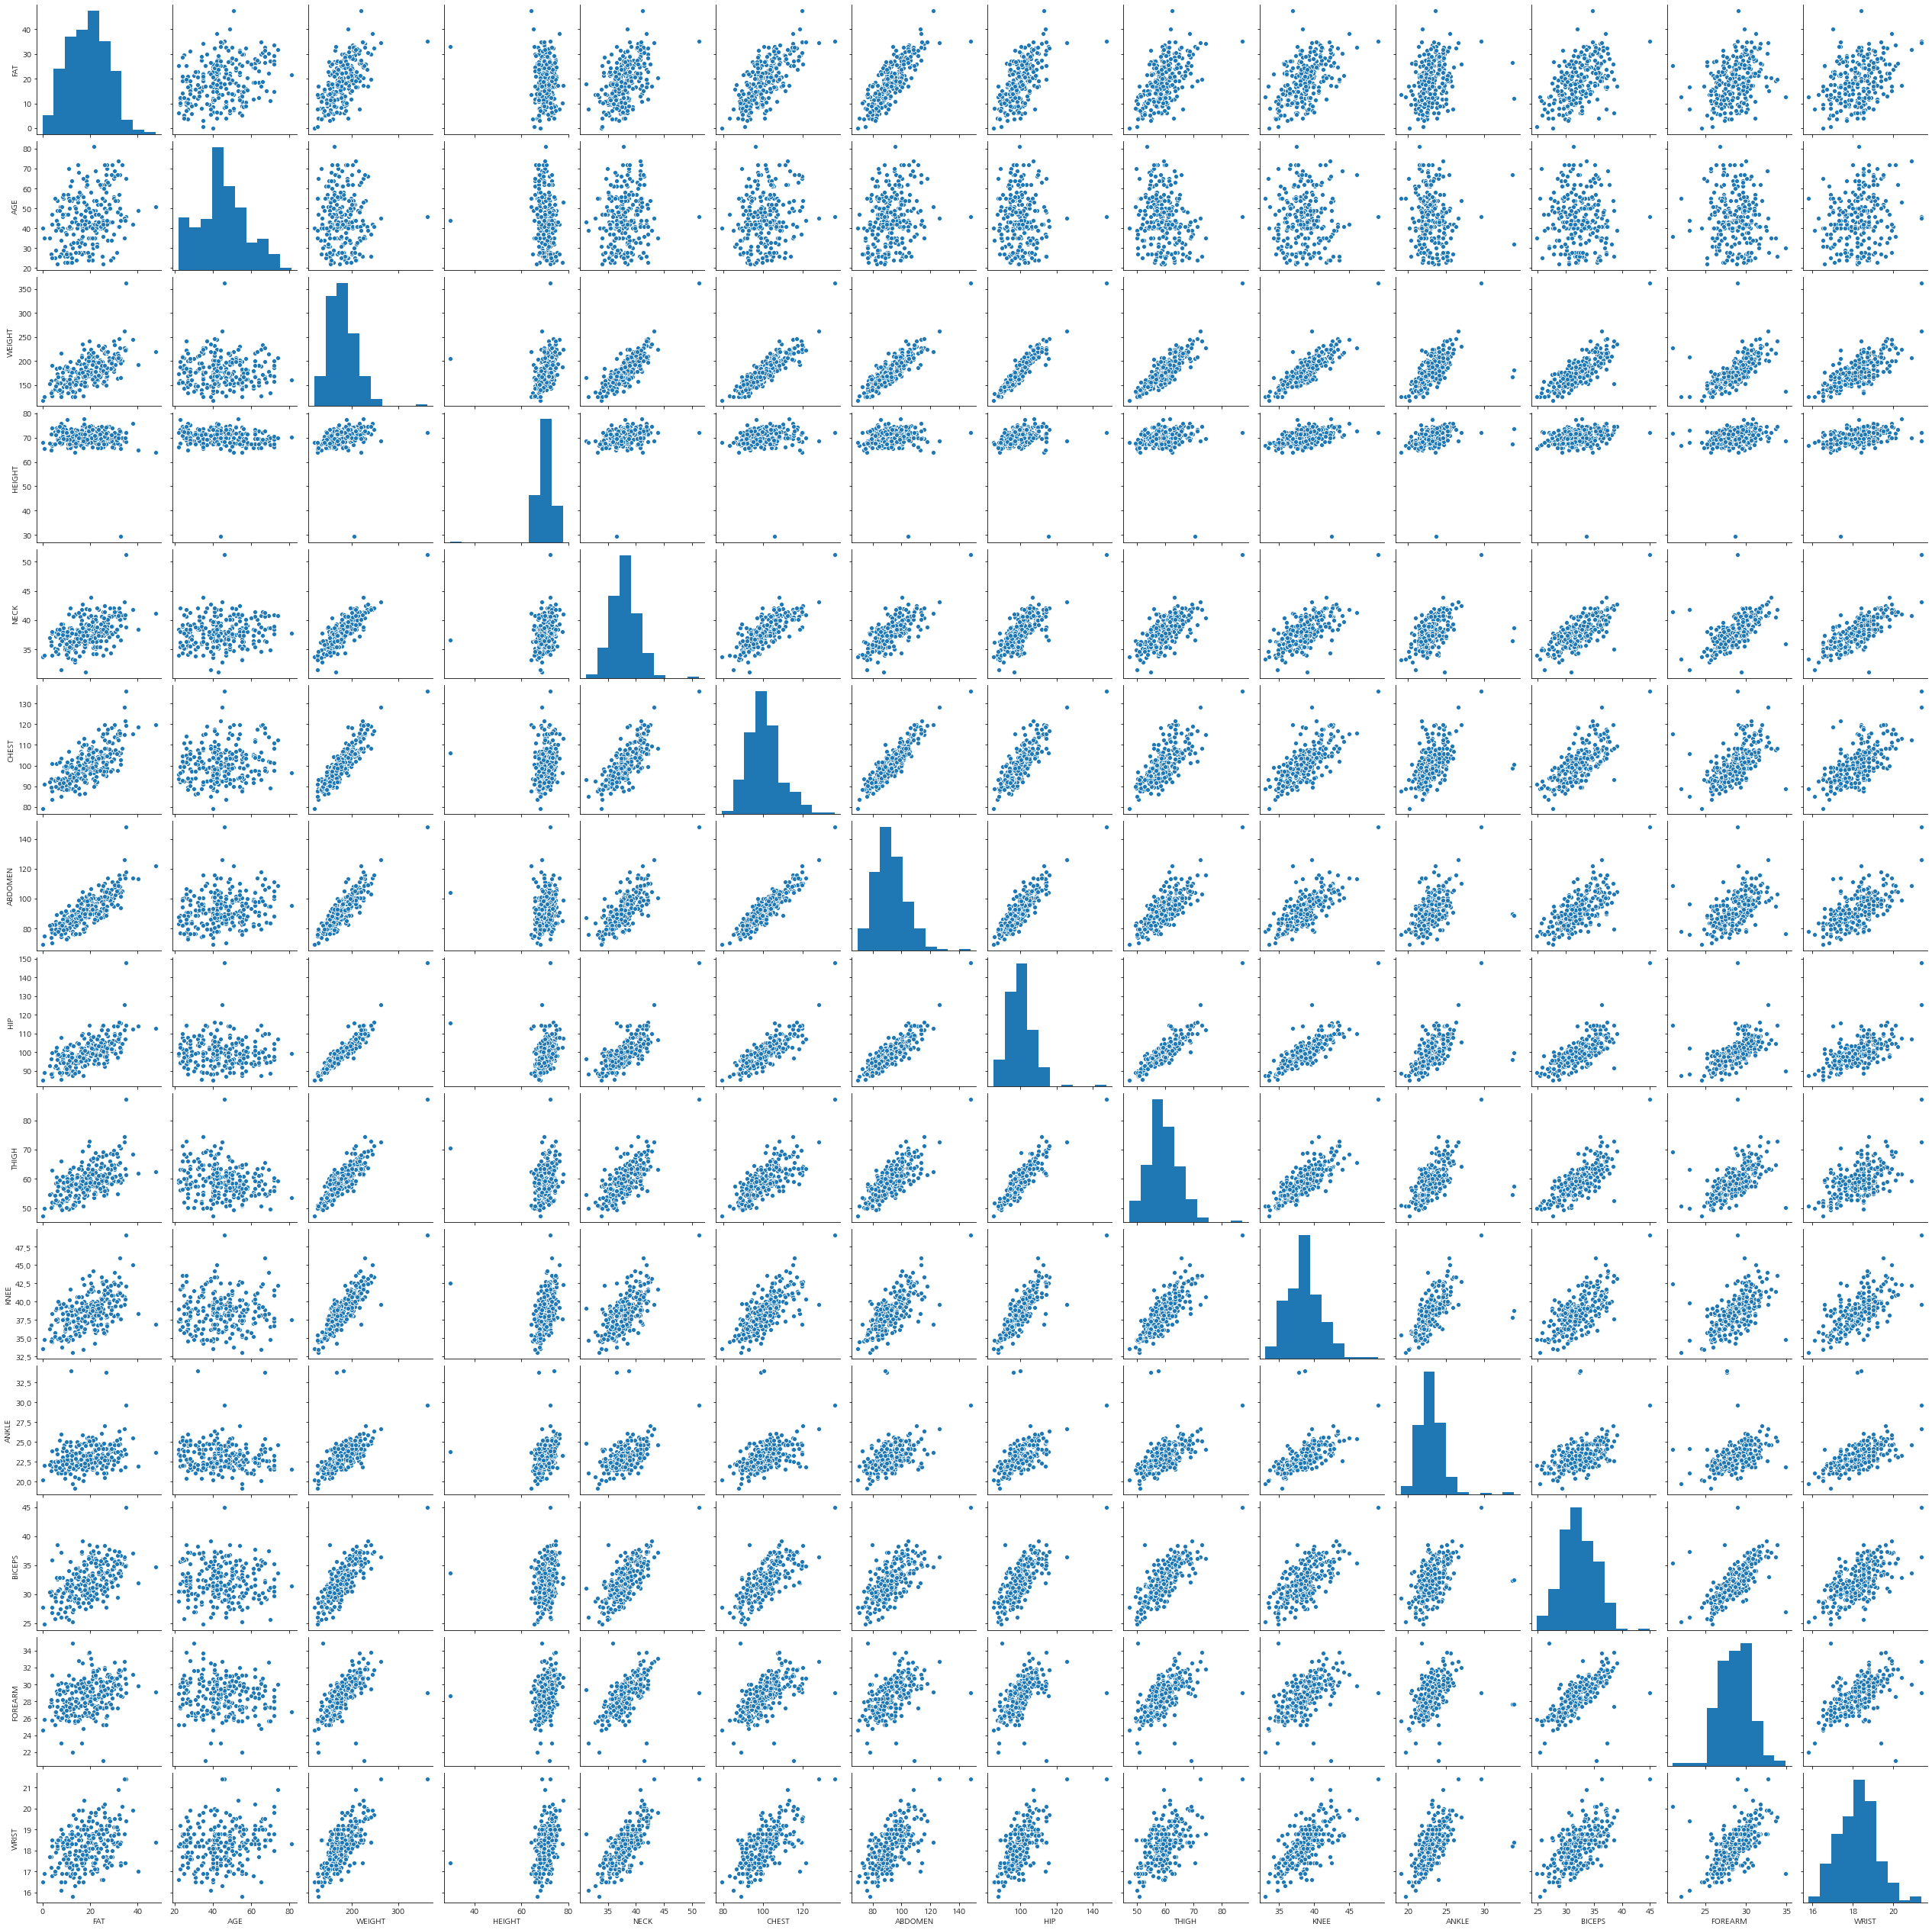

In [17]:
sns.pairplot(df_raw)

### 변수간의 경향성 파악- 상관관계분석 


In [18]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


###  체질 비만도(FAT)와  가슴 둘레(CHEST), 복부둘레(ABDOMEN)간의 높은 선형관계 확인
### 설명변수 상관관계: 다수 설명변수 간의 선형관계 확인 -> 다중 공선성 확인 및 처리 필요

### STEP3. 회귀 모델 생성: 설명변수 전체 

In [19]:
reg_model = smf.ols(formula='FAT~ AGE+WEIGHT+ HEIGHT + NECK + CHEST + ABDOMEN + HIP+ THIGH + KNEE + ANKLE +BICEPS+ FOREARM + WRIST',data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.72e-64
Time:                        11:59:37   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

#### No. Observation(분석 자료 수 ) : 252 Df REsiduals(잔차 자유도) : 238 Df Model(모델 자유도): 13
#### 분산 분석 결과 p값이 유의수준보다 0.05보다 작으므로 회귀모델로서 유의
#### 설명력: 0.749 모델을 통하여 설명변수 EVAL을 74.9% 를 설명할 수 있음
#### 회귀계수 검정 , 절편의 유의성은 검토하지 않음.
#### NECK, ABDOMEN,FOREARM,WRIST의 p값이 유의수준 0.05보다 작으므로 유의

### STEP3. 회귀 모델 생성: 설명변수 간의 다중공선성 확인 

In [20]:
#설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT",axis= 1)
# statsmodels 의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
df_vif= pd.DataFrame()
df_vif["variable"]=df_raw_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
# vif로 정렬
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [21]:
df_raw_x = df_raw.drop(['FAT',"WEIGHT"], axis= 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [22]:
reg_model = smf.ols(formula='FAT~ AGE+ HEIGHT + NECK + CHEST + ABDOMEN + HIP+ THIGH + KNEE + ANKLE +BICEPS+ FOREARM + WRIST',data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           3.75e-64
Time:                        11:59:37   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [23]:
df_raw_y = df_raw['FAT']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x, df_raw_y)
selected_cols = df_raw_x.columns[rfe.support_]
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables:Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [39]:
rfe_reg_model = smf.ols(formula='FAT~NECK + ABDOMEN + HIP + FOREARM + WRIST',data=df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        12:09:41   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

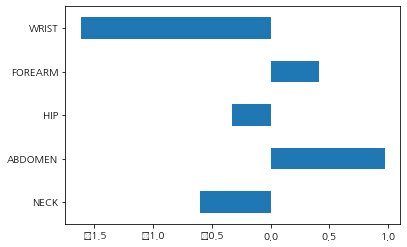

In [40]:
df_reg_coef=pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y='Coef', legend=False)

In [29]:
scaler = StandardScaler()
cols=df_raw_x.columns
np_scaled= scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)
df_scaled['FAT']=df_raw['FAT']
reg_model_scaled = smf.ols(formula = 'FAT ~NECK + ABDOMEN + HIP+ FOREARM+ WRIST',data =df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        12:02:48   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


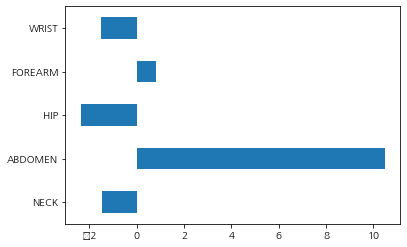

In [31]:
df_reg_scaled_coef = pd.DataFrame({'Coef':reg_result_scaled.params.values[1:]}, index =selected_cols)
df_reg_scaled_coef.plot.barh(y='Coef',legend= False)

# 의사결정나무_연습

In [45]:
import os
os.environ["PATH"]+=os.pathsep + "./anaconda3/lib/python3.8/site-packages/sphinx/templates/graphviz"

In [46]:
import graphviz

In [47]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT",axis=1, inplace=False)

In [48]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print(" train data X size:{}".format(df_train_x.shape))
print(" train data Y size:{}".format(df_train_y.shape))
print(" test data X size:{}".format(df_train_x.shape))
print(" test data Y size:{}".format(df_train_y.shape))

 train data X size:(176, 13)
 train data Y size:(176,)
 test data X size:(176, 13)
 test data Y size:(176,)


### 모델 생성

In [52]:
tree_uncustomized= DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 1.000
Score on test set: 0.345


In [54]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [88]:
train_score ,test_score = [],[]
para_leaf= [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()    
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [89]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


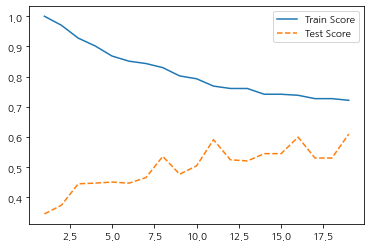

In [90]:
plt.plot(para_leaf,train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.legend()

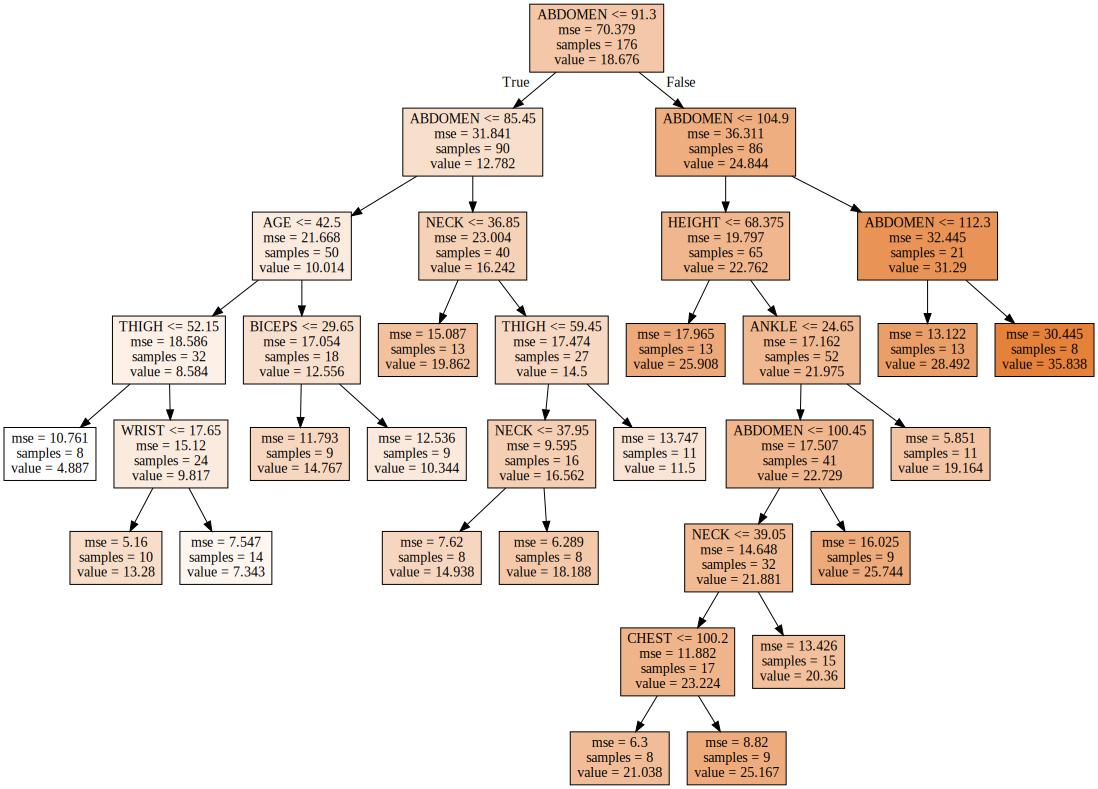

In [91]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',
               feature_names = v_feature_name,impurity =True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


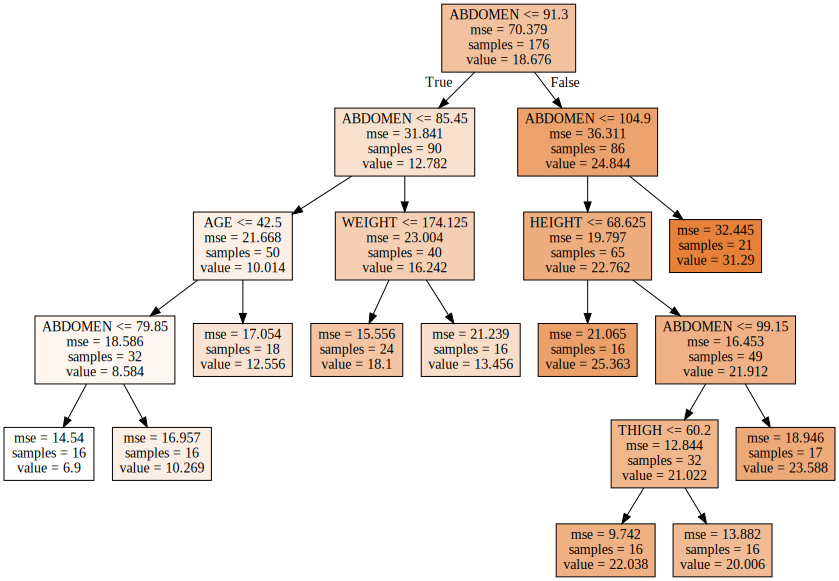

In [77]:
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf=16)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',
               feature_names = v_feature_name,impurity =True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [82]:
train_score ,test_score = [],[]
para_split= [n_leaf * 2 for n_leaf in range(2,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8,min_samples_split=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()    
df_score_split['MinSamplesLeaf']=para_leaf
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [81]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


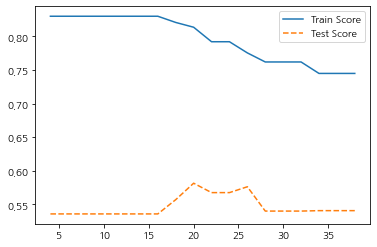

In [83]:
plt.plot(para_split,train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.legend()

In [106]:
train_score ,test_score = [],[]
para_depth= [n_leaf * 2 for n_leaf in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth= v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()    
df_score_split['MinSamplesLeaf']=para_depth
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [107]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.679,0.569
1,4,0.783,0.570
2,6,0.813,0.581
3,8,0.813,0.581
4,10,0.813,0.581
5,12,0.813,0.581
6,14,0.813,0.581
7,16,0.813,0.581
8,18,0.813,0.581
9,20,0.813,0.581


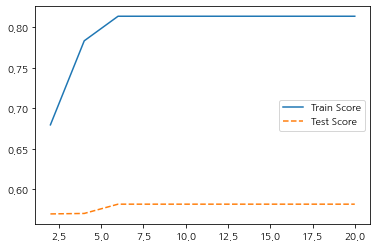

In [108]:
plt.plot(para_depth,train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.legend()

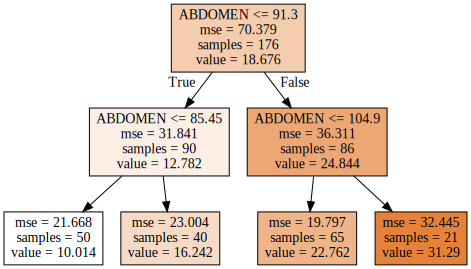

In [110]:

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth= 2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled= True)
with open("tree_depth.dot")as f:
        dot_graph =f.read()
display(graphviz.Source(dot_graph))

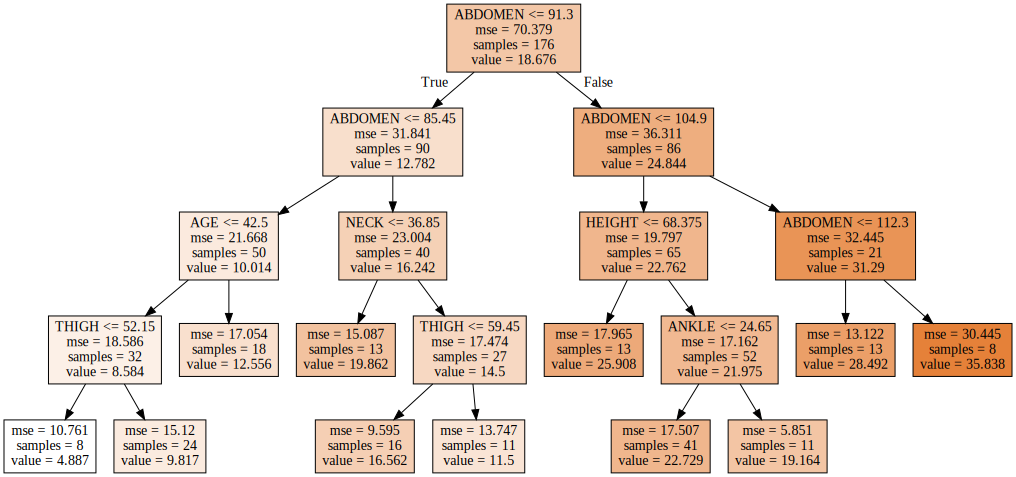

In [111]:

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth= 4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled= True)
with open("tree_depth.dot")as f:
        dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [115]:
tree_final= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split =20, max_depth =4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

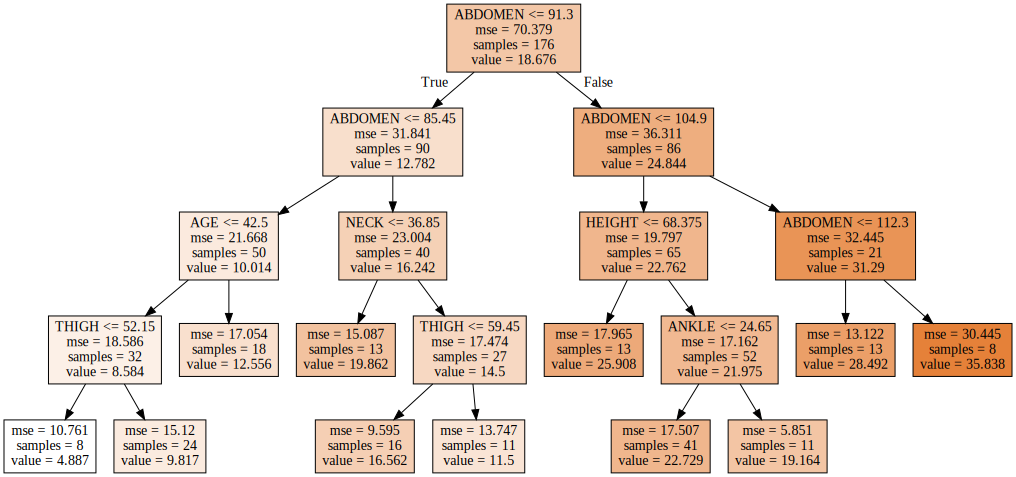

In [116]:
export_graphviz(tree_graph,out_file='tree_final.dot', feature_names=v_feature_name, impurity=True, filled= True)
with open("tree_final.dot")as f:
        dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [117]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance['Importance']= tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

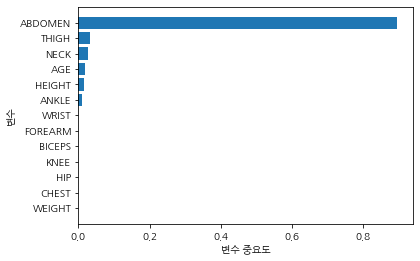

In [121]:

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=12, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=4)

best parameter:
{'criterion': 'mae', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}

best score: 
0.62

# 랜덤 포레스트 연습

In [133]:
df= pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv",engine='python')

In [134]:
rf_uncustomized=RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.956
Score on test set: 0.612


In [135]:
train_score ,test_score = [],[]
para_n_tree= [n_leaf * 2 for n_leaf in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()    
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [136]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.873,0.367
1,4,0.914,0.488
2,6,0.924,0.525
3,8,0.935,0.543
4,10,0.936,0.542
5,12,0.940,0.575
6,14,0.939,0.578
7,16,0.943,0.575
8,18,0.946,0.582
9,20,0.946,0.597


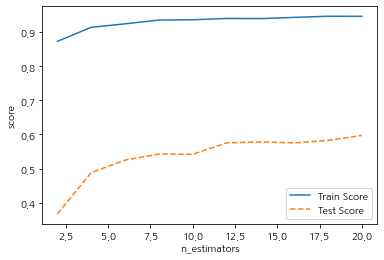

In [137]:
plt.plot(para_n_tree,train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('n_estimators')
plt.legend()

In [139]:
train_score ,test_score = [],[]
para_leaf= [n_leaf * 2 for n_leaf in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()    
df_score_n['MinSamplesLeaf']=para_leaf
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [140]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.939,0.610
1,4,0.891,0.617
2,6,0.849,0.627
3,8,0.816,0.621
4,10,0.786,0.619
5,12,0.759,0.617
6,14,0.740,0.612
7,16,0.720,0.616
8,18,0.701,0.607
9,20,0.690,0.599


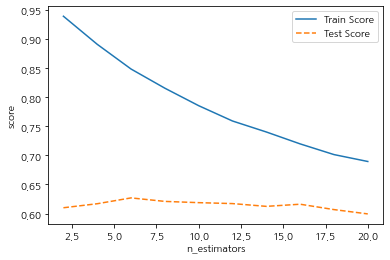

In [141]:
plt.plot(para_leaf,train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('n_estimators')
plt.legend()

In [146]:
train_score ,test_score = [],[]
para_split= [n_leaf * 2 for n_leaf in range(2,21)]

for v_n_estimators in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=6,min_samples_split=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()    
df_score_n['MinSamplesLeaf']=para_split
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [147]:
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.679,0.569
1,4,0.783,0.570
2,6,0.813,0.581
3,8,0.813,0.581
4,10,0.813,0.581
5,12,0.813,0.581
6,14,0.813,0.581
7,16,0.813,0.581
8,18,0.813,0.581
9,20,0.813,0.581


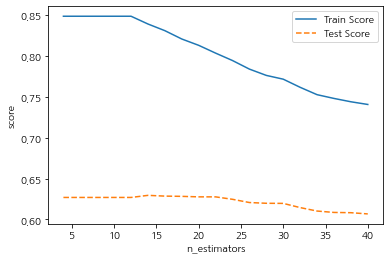

In [148]:
plt.plot(para_split,train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('n_estimators')
plt.legend()

In [171]:
train_score ,test_score = [],[]
para_depth= [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=6,min_samples_split=14,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [172]:
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


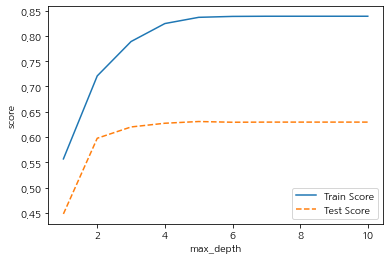

In [174]:
plt.plot(para_depth,train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('max_depth')
plt.legend()

In [179]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100,min_samples_leaf=6,min_samples_split=14,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
print('Score on training set{:.3f}.'.format(rf_final.score(df_train_x,df_train_y)))

print("Score on test set{:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set0.825.
Score on test set0.627


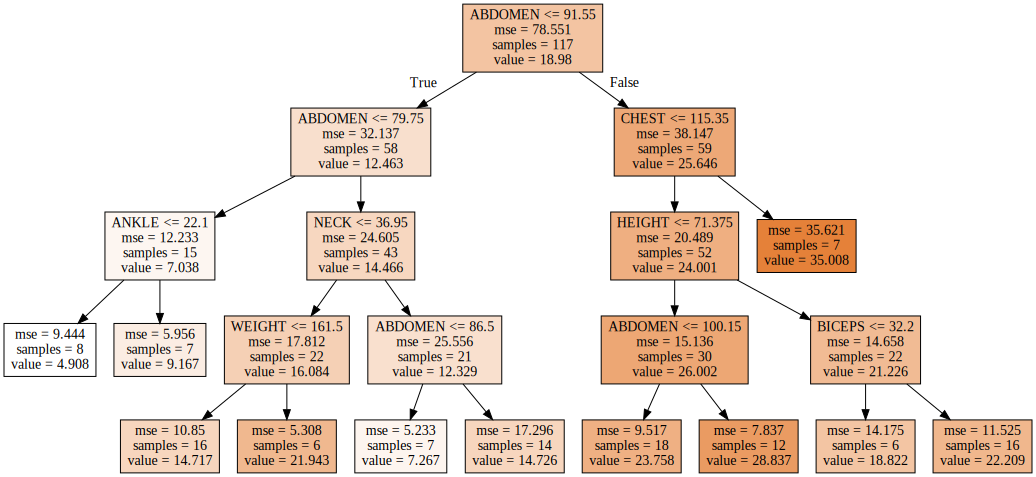

In [181]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0],out_file='rf_final_0.dot',feature_names = v_feature_name, impurity =True,filled=True)
with open('rf_final_0.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


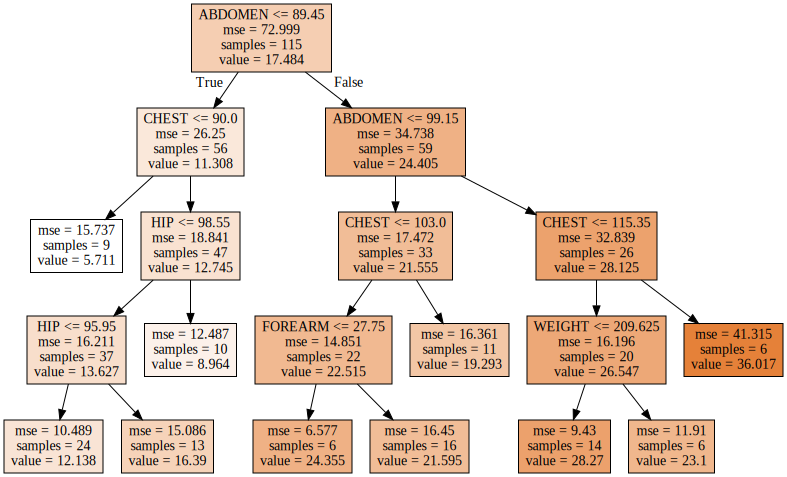

In [182]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[1],out_file='rf_final_1.dot',feature_names = v_feature_name, impurity =True,filled=True)
with open('rf_final_1.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


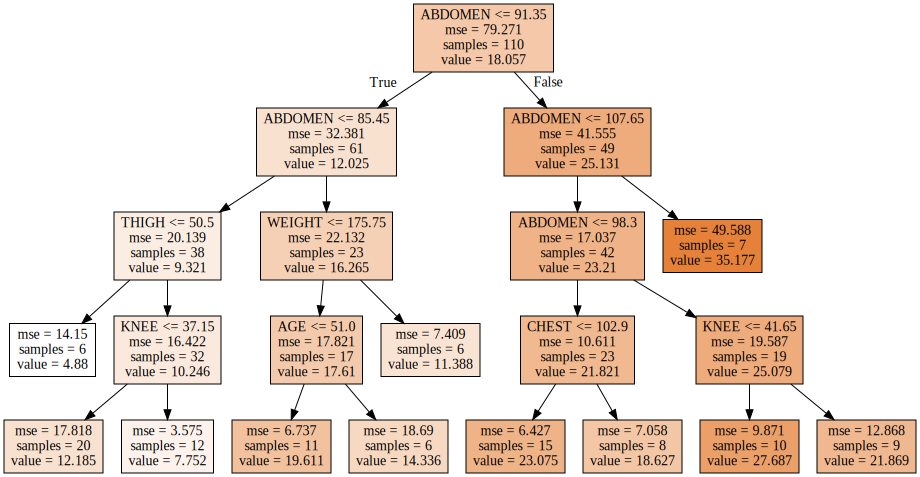

In [184]:

v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[10],out_file='rf_final_10.dot',feature_names = v_feature_name, impurity =True,filled=True)
with open('rf_final_10.dot')as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [185]:
df_importance= pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=True,inplace=True)
df_importance.round(3)

,Feature,Importance
11,FOREARM,0.002
10,BICEPS,0.003
9,ANKLE,0.006
1,WEIGHT,0.008
8,KNEE,0.009
3,NECK,0.010
12,WRIST,0.010
7,THIGH,0.011
6,HIP,0.014
0,AGE,0.014


Text(0, 0.5, '변수')

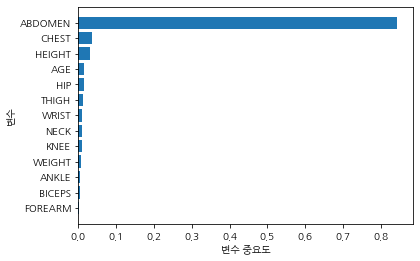

In [187]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# 그래디언트 부스팅_연습

In [189]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print('Score on training set{:.3f}.'.format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set0.981.
Score on test set0.581


In [193]:
train_score ,test_score = [],[]
para_n_tree= [depth * 10 for depth in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['MinSamplesLeaf']=para_n_tree
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [194]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


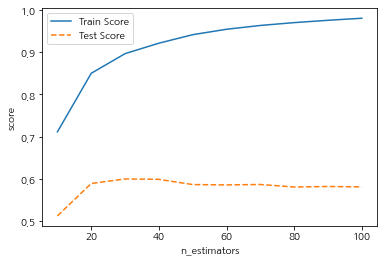

In [195]:
plt.plot(para_n_tree,train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('n_estimators')
plt.legend()

In [212]:
train_score ,test_score = [],[]
para_leaf= [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_estimators in para_n_tree:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=30,min_samples_leaf=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['MinSamplesLeaf']=para_n_tree
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [213]:
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.599
2,3,0.896,0.594
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


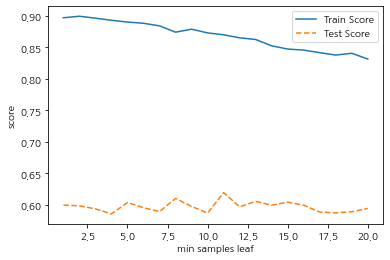

In [214]:
plt.plot(para_n_tree,train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('min samples leaf')
plt.legend()

In [218]:
train_score ,test_score = [],[]
para_leaf= [n_leaf * 2 for n_leaf in range(1,21)]

for v_min_estimators in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=30,min_samples_leaf=11,min_samples_split=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['MinSamplesLeaf']=para_leaf
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [219]:
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


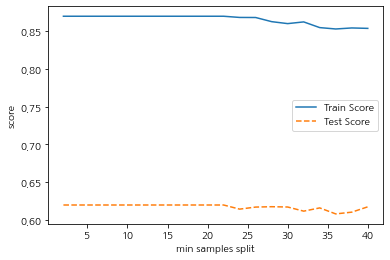

In [221]:
plt.plot(para_leaf,train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

In [225]:
train_score ,test_score = [],[]
para_depth= [depth for depth in range(1,11)]

for v_min_estimators in para_depth:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=30,min_samples_leaf=11,min_samples_split=22,max_depth = v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [226]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


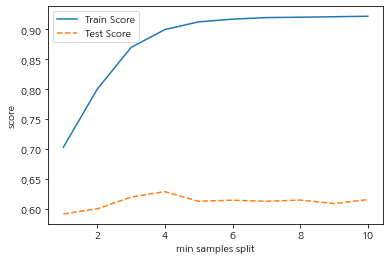

In [227]:
plt.plot(para_depth,train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

In [228]:
train_score ,test_score = [],[]
para_depth= [depth *0.1 for depth in range(1,10)]

for v_min_estimators in para_depth:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=30,min_samples_leaf=11,min_samples_split=22,max_depth = 4,learning_rate=v_min_estimators)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()    
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [229]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


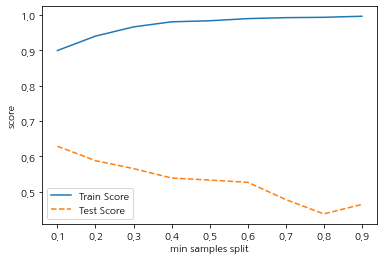

In [230]:
plt.plot(para_depth,train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label = 'Test Score')
plt.ylabel("score")
plt.xlabel('min samples split')
plt.legend()

In [231]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234, n_estimators=30,min_samples_leaf=11,min_samples_split=22,max_depth = 4,learning_rate=0.1)
gb_uncustomized.fit(df_train_x,df_train_y)
print('Score on training set{:.3f}.'.format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set0.900.
Score on test set0.629


In [234]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance['Importance']= gb_uncustomized.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

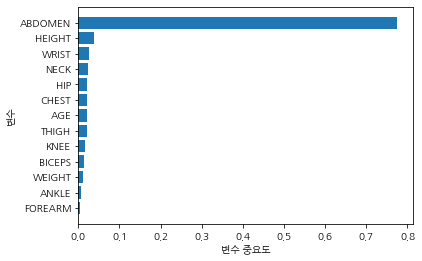

In [235]:

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")